In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Soham/data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [7]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [8]:
df['Geography'] = df['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 2})
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [9]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=10))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                176       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5005 - accuracy: 0.7950 - val_loss: 0.4795 - val_accuracy: 0.7862
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4552 - accuracy: 0.7986 - val_loss: 0.4574 - val_accuracy: 0.7875
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4414 - accuracy: 0.8041 - val_loss: 0.4459 - val_accuracy: 0.8062
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.8077 - val_loss: 0.4399 - val_accuracy: 0.8100
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8131 - val_loss: 0.4366 - val_accuracy: 0.8119
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8147 - val_loss: 0.4361 - val_accuracy: 0.8150
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4198 - accuracy: 0.8195 - val_loss: 0.4328 - val_accuracy: 0.8181
Epoch 

In [68]:
y_pred = model.predict(X_test)
y_pred

63/63 [==============================] - 0s 986us/step


array([[0.30361235],
       [0.06278556],
       [0.05423907],
       ...,
       [0.2231135 ],
       [0.9999446 ],
       [0.05093797]], dtype=float32)

In [69]:
y_pred = (y_pred > 0.5).astype(int)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.868

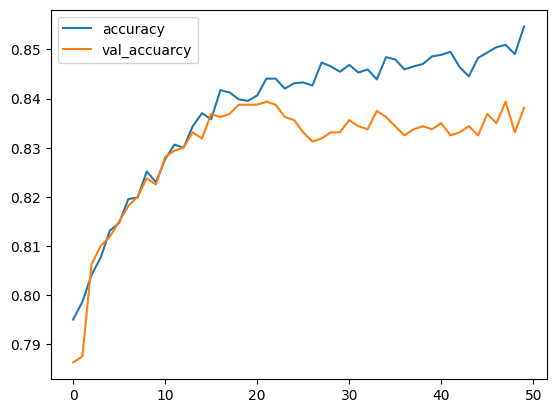

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuarcy'])
plt.show()

Underfitting: Gap between training and validation lines, poor overall performance.
Overfitting: Spikes in validation metrics, model memorizing training data.
Scaling: Makes features comparable, improving model performance and learning efficiency.

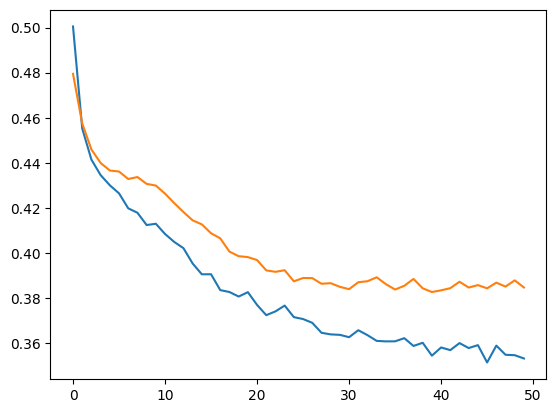

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])